In [1]:
from google.colab import drive
import tarfile
import os, cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from keras.utils import np_utils
drive.mount('/content/drive'),

Mounted at /content/drive


(None,)

In [2]:
data_path = '/content/drive/MyDrive/facial_expression/jaffe'
data_dir_list = os.listdir(data_path)

img_si=128
epochs = 200
num_channel=1
img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(img_si,img_si))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-HAPPY

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 128, 128, 3)

In [3]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [4]:
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

X_train1 = X_train
X_train2 = X_train
X_train3 = X_train
X_train4 = X_train
X_train5 = X_train
X_train6 = X_train

X_test1 = X_test
X_test2 = X_test
X_test3 = X_test
X_test4 = X_test
X_test5 = X_test
X_test6 = X_test

y_train1 = y_train
y_train2 = y_train
y_train3 = y_train
y_train4 = y_train
y_train5 = y_train
y_train6 = y_train

y_test1 = y_test
y_test2 = y_test
y_test3 = y_test
y_test4 = y_test
y_test5 = y_test
y_test6 = y_test

#X_train=X_train.reshape(X_train.shape[0],128,128,1)
#X_test=X_test.reshape(X_test.shape[0],128,128,1)

In [5]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras import regularizers

In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [7]:
input_shape=(img_si,img_si,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [9]:
from keras import callbacks
filename1='modelFlipping_train_new.csv'
filename4='modelRotation_train_new.csv'
filename16='modelZoom_train_new.csv'
filename64='modelBrightness_train_new.csv'
filename128='modelShifting_train_new.csv'
filename256='modelNone_train_new.csv'
filename512='modelNone_train_new.csv'

filepath1 = os.path.join('checkpoint', filename1)
filepath4 = os.path.join('checkpoint', filename4)
filepath16 = os.path.join('checkpoint', filename16)
filepath64 = os.path.join('checkpoint', filename64)
filepath128 = os.path.join('checkpoint', filename128)
filepath256 = os.path.join('checkpoint', filename256)
filepath512 = os.path.join('checkpoint', filename512)

checkpoint1 = callbacks.ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint4 = callbacks.ModelCheckpoint(filepath4, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint16 = callbacks.ModelCheckpoint(filepath16, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint64 = callbacks.ModelCheckpoint(filepath64, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint128 = callbacks.ModelCheckpoint(filepath128, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint256 = callbacks.ModelCheckpoint(filepath256, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint512 = callbacks.ModelCheckpoint(filepath512, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

In [10]:
from sklearn.decomposition import PCA

dataNone = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2)

dataFlipping = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)

dataRotation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    validation_split=0.2)

dataZoom = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5,0.5],
    validation_split=0.2)

dataBrightness = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=[0.2,2.0],
    validation_split=0.2)

dataShifting = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range=0.5,
    validation_split=0.2)

dataAll = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    zoom_range=[0.5,0.5],
    brightness_range=[0.2,2.0],
    validation_split=0.2)

In [11]:
dataShifting.fit(X_train4)
hist5 = model.fit(dataShifting.flow(X_train4, y_train4, batch_size=10, subset='training'),
                  validation_data=dataShifting.flow(X_train4, y_train4, batch_size=7, subset='validation'), epochs=epochs, callbacks=checkpoint128)

Epoch 1/200
14/14 [==============================] - 33s 111ms/step - loss: 2.1207 - accuracy: 0.0809 - val_loss: 1.9514 - val_accuracy: 0.0588

Epoch 00001: val_accuracy improved from -inf to 0.05882, saving model to checkpoint/modelShifting_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelShifting_train_new.csv/assets
Epoch 2/200
14/14 [==============================] - 1s 66ms/step - loss: 1.9817 - accuracy: 0.1544 - val_loss: 1.9556 - val_accuracy: 0.0882

Epoch 00002: val_accuracy improved from 0.05882 to 0.08824, saving model to checkpoint/modelShifting_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelShifting_train_new.csv/assets
Epoch 3/200
14/14 [==============================] - 1s 65ms/step - loss: 1.9462 - accuracy: 0.1029 - val_loss: 1.9502 - val_accuracy: 0.1765

Epoch 00003: val_accuracy improved from 0.08824 to 0.17647, saving model to checkpoint/modelShifting_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelShifting_train

In [12]:
dataBrightness.fit(X_train3)
hist4 = model.fit(dataBrightness.flow(X_train3, y_train3, batch_size=10, subset='training'),
                  validation_data=dataBrightness.flow(X_train3, y_train3, batch_size=7, subset='validation'), epochs=epochs, callbacks=checkpoint64)

Epoch 1/200
14/14 [==============================] - 0s 27ms/step - loss: 69.9775 - accuracy: 0.1691 - val_loss: 2.4716 - val_accuracy: 0.2059

Epoch 00001: val_accuracy improved from -inf to 0.20588, saving model to checkpoint/modelBrightness_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelBrightness_train_new.csv/assets
Epoch 2/200
14/14 [==============================] - 0s 24ms/step - loss: 1.9877 - accuracy: 0.1838 - val_loss: 1.9744 - val_accuracy: 0.1176

Epoch 00002: val_accuracy did not improve from 0.20588
Epoch 3/200
14/14 [==============================] - 0s 23ms/step - loss: 1.8505 - accuracy: 0.2500 - val_loss: 1.8858 - val_accuracy: 0.2059

Epoch 00003: val_accuracy did not improve from 0.20588
Epoch 4/200
14/14 [==============================] - 0s 23ms/step - loss: 1.7232 - accuracy: 0.4044 - val_loss: 1.8650 - val_accuracy: 0.2353

Epoch 00004: val_accuracy improved from 0.20588 to 0.23529, saving model to checkpoint/modelBrightness_train_new.csv
INF

In [13]:
dataNone.fit(X_train5)
hist6 = model.fit(dataNone.flow(X_train5, y_train5, batch_size=10, subset='training'),
                  validation_data=dataNone.flow(X_train5, y_train5, batch_size=7, subset='validation'), epochs=epochs, callbacks=checkpoint256)

Epoch 1/200
14/14 [==============================] - 0s 21ms/step - loss: 2.6512 - accuracy: 0.1618 - val_loss: 1.9121 - val_accuracy: 0.3824

Epoch 00001: val_accuracy improved from -inf to 0.38235, saving model to checkpoint/modelNone_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelNone_train_new.csv/assets
Epoch 2/200
14/14 [==============================] - 0s 22ms/step - loss: 1.8508 - accuracy: 0.3456 - val_loss: 1.8966 - val_accuracy: 0.2647

Epoch 00002: val_accuracy did not improve from 0.38235
Epoch 3/200
14/14 [==============================] - 0s 21ms/step - loss: 1.7703 - accuracy: 0.3529 - val_loss: 1.8711 - val_accuracy: 0.3235

Epoch 00003: val_accuracy did not improve from 0.38235
Epoch 4/200
14/14 [==============================] - 0s 20ms/step - loss: 1.6767 - accuracy: 0.4265 - val_loss: 1.8271 - val_accuracy: 0.3529

Epoch 00004: val_accuracy did not improve from 0.38235
Epoch 5/200
14/14 [==============================] - 0s 20ms/step - loss: 1.56

In [14]:
dataFlipping.fit(X_train)
hist1 = model.fit(dataFlipping.flow(X_train, y_train, batch_size=10, subset='training'),
                  validation_data=dataFlipping.flow(X_train, y_train, batch_size=7, subset='validation'), epochs=epochs, callbacks=checkpoint1)

Epoch 1/200
14/14 [==============================] - 0s 22ms/step - loss: 3.4032 - accuracy: 0.4044 - val_loss: 1.7905 - val_accuracy: 0.3529

Epoch 00001: val_accuracy improved from -inf to 0.35294, saving model to checkpoint/modelFlipping_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelFlipping_train_new.csv/assets
Epoch 2/200
14/14 [==============================] - 0s 22ms/step - loss: 1.7340 - accuracy: 0.3676 - val_loss: 1.8532 - val_accuracy: 0.3529

Epoch 00002: val_accuracy did not improve from 0.35294
Epoch 3/200
14/14 [==============================] - 0s 22ms/step - loss: 1.6882 - accuracy: 0.4191 - val_loss: 1.7698 - val_accuracy: 0.3529

Epoch 00003: val_accuracy did not improve from 0.35294
Epoch 4/200
14/14 [==============================] - 0s 21ms/step - loss: 1.5558 - accuracy: 0.4779 - val_loss: 1.6901 - val_accuracy: 0.4118

Epoch 00004: val_accuracy improved from 0.35294 to 0.41176, saving model to checkpoint/modelFlipping_train_new.csv
INFO:tenso

In [15]:
dataRotation.fit(X_train1)
hist2 = model.fit(dataRotation.flow(X_train1, y_train1, batch_size=10, subset='training'),
                  validation_data=dataRotation.flow(X_train1, y_train1, batch_size=7, subset='validation'), epochs=epochs, callbacks=checkpoint4)

Epoch 1/200
14/14 [==============================] - 1s 59ms/step - loss: 4.2752 - accuracy: 0.2353 - val_loss: 1.9545 - val_accuracy: 0.0588

Epoch 00001: val_accuracy improved from -inf to 0.05882, saving model to checkpoint/modelRotation_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelRotation_train_new.csv/assets
Epoch 2/200
14/14 [==============================] - 1s 57ms/step - loss: 1.9397 - accuracy: 0.1912 - val_loss: 1.9400 - val_accuracy: 0.2647

Epoch 00002: val_accuracy improved from 0.05882 to 0.26471, saving model to checkpoint/modelRotation_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelRotation_train_new.csv/assets
Epoch 3/200
14/14 [==============================] - 1s 56ms/step - loss: 1.9439 - accuracy: 0.1691 - val_loss: 1.9339 - val_accuracy: 0.3235

Epoch 00003: val_accuracy improved from 0.26471 to 0.32353, saving model to checkpoint/modelRotation_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelRotation_train_n

In [16]:
dataZoom.fit(X_train2)
hist3 = model.fit(dataZoom.flow(X_train2, y_train2, batch_size=10, subset='training'),
                  validation_data=dataZoom.flow(X_train2, y_train2, batch_size=7, subset='validation'), epochs=epochs, callbacks=checkpoint16)

Epoch 1/200
14/14 [==============================] - 1s 55ms/step - loss: 3.8393 - accuracy: 0.1838 - val_loss: 1.9064 - val_accuracy: 0.1765

Epoch 00001: val_accuracy improved from -inf to 0.17647, saving model to checkpoint/modelZoom_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelZoom_train_new.csv/assets
Epoch 2/200
14/14 [==============================] - 1s 56ms/step - loss: 1.8836 - accuracy: 0.2574 - val_loss: 1.8928 - val_accuracy: 0.1765

Epoch 00002: val_accuracy did not improve from 0.17647
Epoch 3/200
14/14 [==============================] - 1s 53ms/step - loss: 1.7794 - accuracy: 0.3015 - val_loss: 1.8596 - val_accuracy: 0.2941

Epoch 00003: val_accuracy improved from 0.17647 to 0.29412, saving model to checkpoint/modelZoom_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelZoom_train_new.csv/assets
Epoch 4/200
14/14 [==============================] - 1s 59ms/step - loss: 1.6216 - accuracy: 0.4485 - val_loss: 1.7586 - val_accuracy: 0.3235



In [17]:
dataAll.fit(X_train6)
hist7 = model.fit(dataAll.flow(X_train6, y_train6, batch_size=10, subset='training'),
                  validation_data=dataAll.flow(X_train6, y_train6, batch_size=7, subset='validation'), epochs=epochs, callbacks=checkpoint512)

Epoch 1/200
14/14 [==============================] - 1s 63ms/step - loss: 815.8765 - accuracy: 0.1838 - val_loss: 82.5773 - val_accuracy: 0.2353

Epoch 00001: val_accuracy improved from -inf to 0.23529, saving model to checkpoint/modelNone_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelNone_train_new.csv/assets
Epoch 2/200
14/14 [==============================] - 1s 68ms/step - loss: 74.9787 - accuracy: 0.1397 - val_loss: 16.6187 - val_accuracy: 0.0588

Epoch 00002: val_accuracy did not improve from 0.23529
Epoch 3/200
14/14 [==============================] - 1s 61ms/step - loss: 22.4440 - accuracy: 0.1471 - val_loss: 7.2712 - val_accuracy: 0.2059

Epoch 00003: val_accuracy did not improve from 0.23529
Epoch 4/200
14/14 [==============================] - 1s 61ms/step - loss: 10.7540 - accuracy: 0.1397 - val_loss: 4.9652 - val_accuracy: 0.0882

Epoch 00004: val_accuracy did not improve from 0.23529
Epoch 5/200
14/14 [==============================] - 1s 61ms/step - los

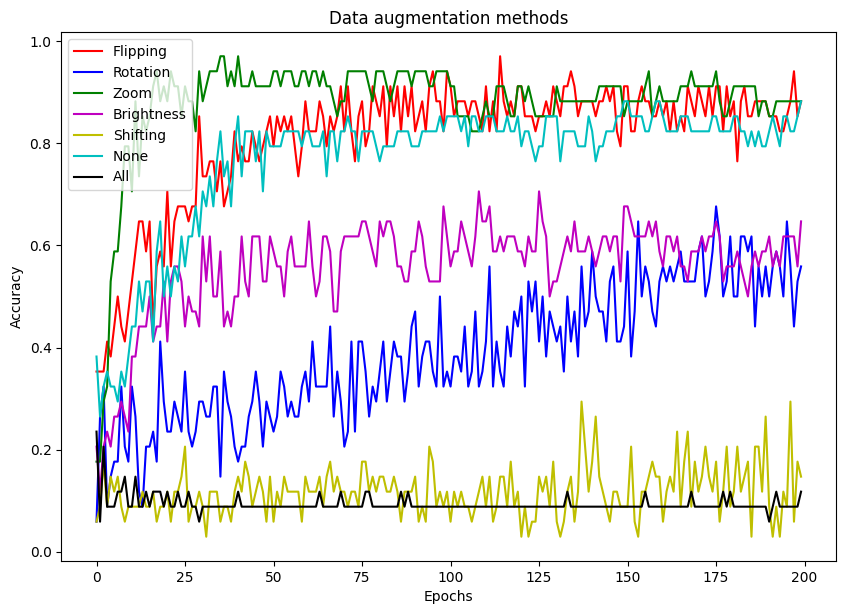

In [18]:
train_loss=hist4.history['loss']
val_loss=hist4.history['val_loss']
train_acc=hist4.history['accuracy']

val_acc=hist1.history['val_accuracy']
bval_acc=hist2.history['val_accuracy']
cval_acc=hist3.history['val_accuracy']
dval_acc=hist4.history['val_accuracy']
eval_acc=hist5.history['val_accuracy']
fval_acc=hist6.history['val_accuracy']
gval_acc=hist7.history['val_accuracy']

epochs = range(len(train_acc))

pyplot.figure(figsize=(10,7), dpi= 100)
pyplot.plot(epochs,val_acc,'r', label='Flipping')
pyplot.plot(epochs,bval_acc,'b', label='Rotation')
pyplot.plot(epochs,cval_acc,'g', label='Zoom')
pyplot.plot(epochs,dval_acc,'m', label='Brightness')
pyplot.plot(epochs,eval_acc,'y', label='Shifting')
pyplot.plot(epochs,fval_acc,'c', label='None')
pyplot.plot(epochs,gval_acc,'k', label='All')
pyplot.title('Data augmentation methods')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()